<a href="https://colab.research.google.com/github/DeborahKerubo/Students-Depression/blob/main/Copy_of_Debbie_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import Libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Read in data
data = pd.read_csv('/Depression Student Dataset.csv')
#data = pd.read_csv('/content/Depression Student Dataset.csv')
data.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28,2.0,4.0,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28,4.0,5.0,5-6 hours,Healthy,Yes,7,1,Yes,No
2,Male,25,1.0,3.0,5-6 hours,Unhealthy,Yes,10,4,No,Yes
3,Male,23,1.0,4.0,More than 8 hours,Unhealthy,Yes,7,2,Yes,No
4,Female,31,1.0,5.0,More than 8 hours,Healthy,Yes,4,2,Yes,No


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 502 non-null    object 
 1   Age                                    502 non-null    int64  
 2   Academic Pressure                      502 non-null    float64
 3   Study Satisfaction                     502 non-null    float64
 4   Sleep Duration                         502 non-null    object 
 5   Dietary Habits                         502 non-null    object 
 6   Have you ever had suicidal thoughts ?  502 non-null    object 
 7   Study Hours                            502 non-null    int64  
 8   Financial Stress                       502 non-null    int64  
 9   Family History of Mental Illness       502 non-null    object 
 10  Depression                             502 non-null    object 
dtypes: flo

In [ ]:
data.isnull().sum()

,0
Gender,0
Age,0
Academic Pressure,0
Study Satisfaction,0
Sleep Duration,0
Dietary Habits,0
Have you ever had suicidal thoughts ?,0
Study Hours,0
Financial Stress,0
Family History of Mental Illness,0


How does Depression vary with Gender?

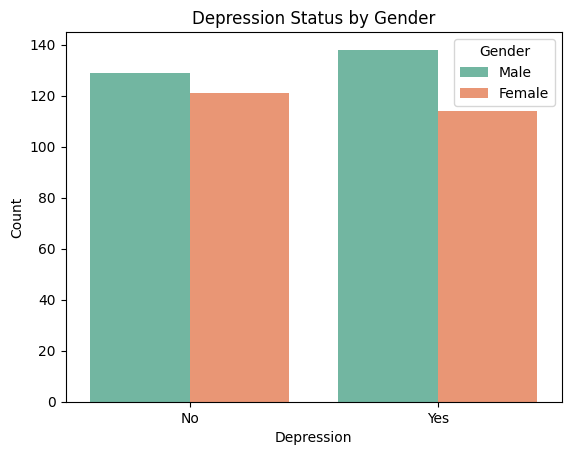

In [ ]:
# Depression by gender
sns.countplot(x='Depression', hue = 'Gender',data=data, palette='Set2')
plt.title('Depression Status by Gender')
plt.xlabel('Depression')
plt.ylabel('Count')
plt.show()

There are more male students  who are depressed as compared to female students.

How does Academic pressure affect Depression?

<ipython-input-39-08cb2c4dea68>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Depression', y='Academic Pressure', data=data, palette='Set2')


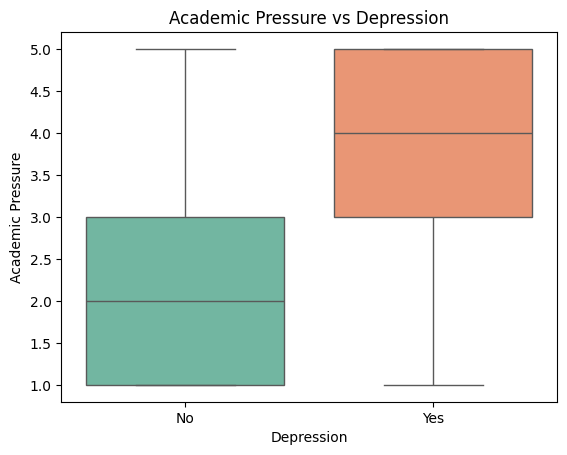

In [ ]:
sns.boxplot(x='Depression', y='Academic Pressure', data=data, palette='Set2')
plt.title('Academic Pressure vs Depression')
plt.xlabel('Depression')
plt.ylabel('Academic Pressure')
plt.show()

As academic pressure rating increases, students are  more likely to experience depression, as the yes box plot has a higher meduan compared to the no depression boxplot.


How does sleep duration affect depression?

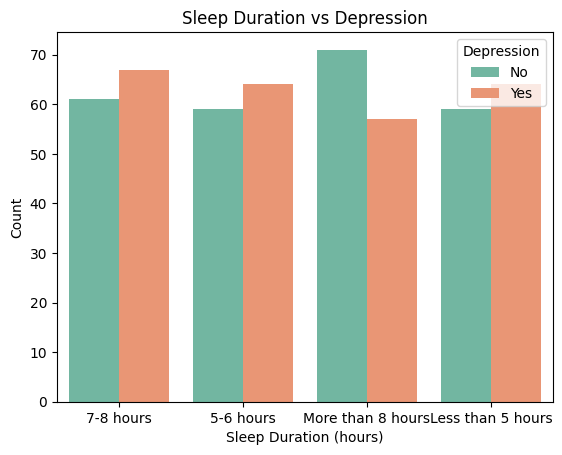

In [ ]:
# Sleep duration and depression
sns.countplot(x='Sleep Duration', hue='Depression', data=data, palette='Set2')
plt.title('Sleep Duration vs Depression')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Count')
plt.show()

The impact of sleep on depression varies, with no clear pattern. Depression is most common among students who sleep less than 5 hours, while those who sleep more than 8 hours report the lowest levels of depression.


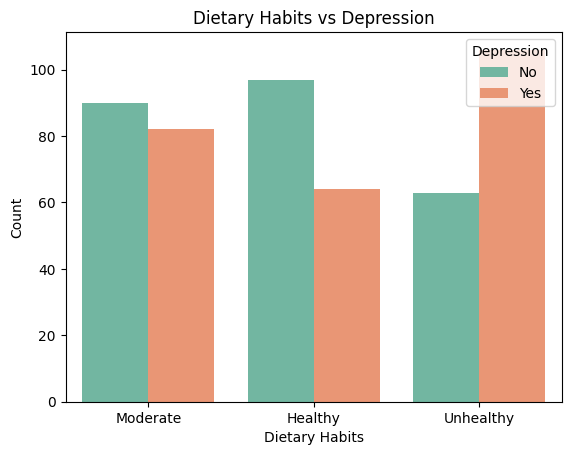

In [ ]:
sns.countplot(x='Dietary Habits', hue='Depression', data=data, palette='Set2')
plt.title('Dietary Habits vs Depression')
plt.xlabel('Dietary Habits')
plt.ylabel('Count')
plt.show()

Students with unhealthy habits have the highest cases of depression, while those with healthy habits have the  lowest cases of depression.


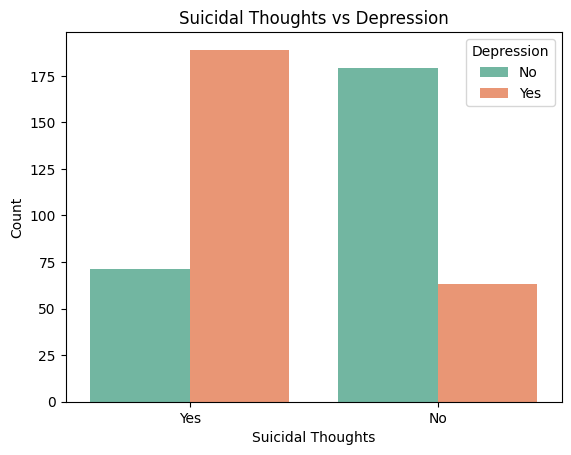

In [ ]:
sns.countplot(x='Have you ever had suicidal thoughts ?', hue='Depression', data=data, palette='Set2')
plt.title('Suicidal Thoughts vs Depression')
plt.xlabel('Suicidal Thoughts')
plt.ylabel('Count')
plt.show()

Students who have ever had suicidal thoughts have the highest cases of depression while those who have never had suicidal thoughts have the lowest number of depression cases.

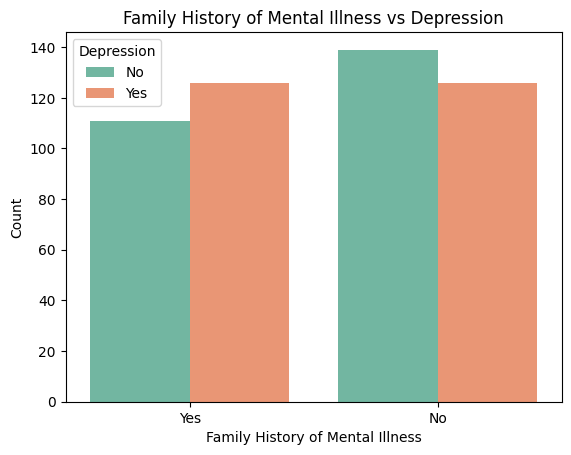

In [ ]:
sns.countplot(x='Family History of Mental Illness', hue='Depression', data=data, palette='Set2')
plt.title('Family History of Mental Illness vs Depression')
plt.xlabel('Family History of Mental Illness')
plt.ylabel('Count')
plt.show()

Students with Family History of depression has more cases of depression as compared to those with no family history of depression.

<ipython-input-34-114e80937bdc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Depression', y='Study Hours', data=data, palette='Set2')


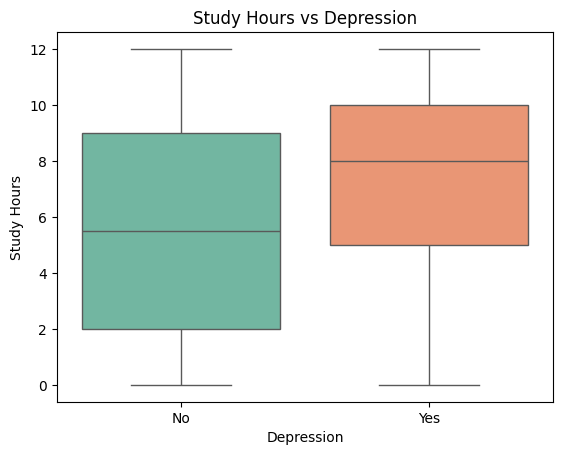

In [ ]:


# Study Hours vs. Depression
sns.boxplot(x='Depression', y='Study Hours', data=data, palette='Set2')
plt.title('Study Hours vs Depression')
plt.xlabel('Depression')
plt.ylabel('Study Hours')
plt.show()

Students who study for less than 9 hours have report to have no depression, but those who study for more than 9 hours report yes to depression.

In [ ]:
#Random Forest

def evaluate_depression_model(data, positive_class='Yes'):
    """
    Fits a random forest model to predict depression and evaluates its performance.
    """
    X = data.drop('Depression', axis=1)
    y = data['Depression']
    X = pd.get_dummies(X, drop_first=True)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf_classifier = RandomForestClassifier(random_state=42)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    print(classification_report(y_test, y_pred, labels=['Yes', 'No'], target_names=['Yes','No'])) # Specify labels for report
    conf_matrix = confusion_matrix(y_test, y_pred, labels=['Yes','No']) # Specifying labels
    print("Confusion Matrix:\n", conf_matrix)
    tn, fp, fn, tp = conf_matrix.ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    print(f"Specificity (Positive Class = {positive_class}): {specificity}")
    print(f"Sensitivity (Positive Class = {positive_class}): {sensitivity}")

# Call the function with your data and specified positive class.
evaluate_depression_model(data, positive_class='Yes')

              precision    recall  f1-score   support

         Yes       0.94      0.96      0.95        53
          No       0.96      0.94      0.95        48

    accuracy                           0.95       101
   macro avg       0.95      0.95      0.95       101
weighted avg       0.95      0.95      0.95       101

Confusion Matrix:
 [[51  2]
 [ 3 45]]
Specificity (Positive Class = Yes): 0.9622641509433962
Sensitivity (Positive Class = Yes): 0.9375


The random forest model has a sensitivity of 0.93,We will use Sensitivity also known as True Positive Rate measures the proportion of actual positives students with depression that are correctly identified by the model. Maximizing sensitivity is much better, because failing to identify students who have depression  can have serious consequences for their well-being.